# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

### Read the csv data into a pandas dataframe and display the first 5 samples

In [5]:
real_estate = pd.read_csv('/Users/jjimenez/Documents/Estudio/College/George Brown/Semester I/ML-I/GBC-ML-I/task6/Real estate.csv', sep=',')
real_estate.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [8]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [9]:
real_estate.shape

(414, 8)

### What are the features available in the dataset?

In [10]:
real_estate.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [13]:
real_estate.isnull().sum(axis=0)

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [19]:
X = real_estate.iloc[:, :-1]
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [22]:
y = real_estate.iloc[:, -1]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=25)

### Choose the model (Linear Regression)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

### Create an Estimator object

In [39]:
regr = LinearRegression()

### Train the model

In [40]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Apply the model

In [41]:
real_estate_y_pred = regr.predict(X_test)
real_estate_y_pred

array([38.07606321, 48.3728883 , 48.49446726, 46.23602833, 35.32009749,
       28.75441442, 44.72403011, 47.93653879, 46.45503135, 48.24154822,
       12.90043074, 40.22737479, 40.28422768, 48.36378601, 42.95004583,
       44.86687086, 43.79652911, 13.57602622, 45.42525636, 31.61448976,
       34.13110896])

### Display the coefficients

In [42]:
 regr.coef_

array([-3.18677110e-03,  5.42189382e+00, -2.71052572e-01, -4.50403592e-03,
        1.13139637e+00,  2.21926229e+02, -1.03889133e+01])

### Find how well the trained model did with testing data

In [57]:
print("r2 score :  %.2f" % r2_score(y_test, real_estate_y_pred))

r2 score :  0.82


### Plot House Age Vs Price
#### Hint: Use regplot in sns

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

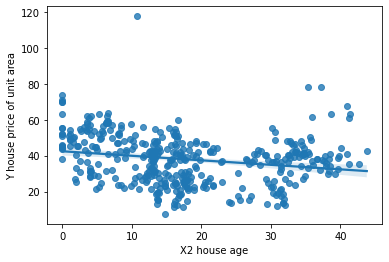

In [59]:
sns.regplot(real_estate['X2 house age'], real_estate['Y house price of unit area'])

### Plot Distance to MRT station Vs Price

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

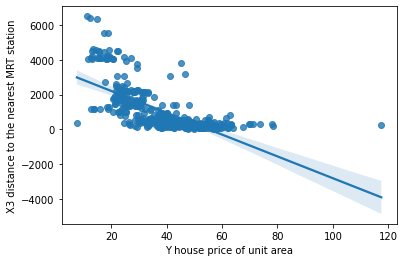

In [60]:
sns.regplot(real_estate['Y house price of unit area'], real_estate['X3 distance to the nearest MRT station'])

### Plot Number of Convienience Stores Vs Price

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>

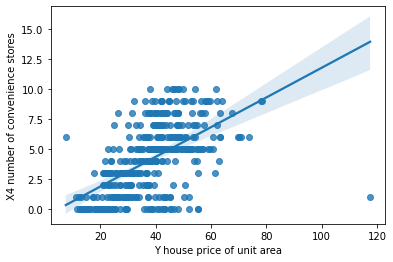

In [61]:
sns.regplot(real_estate['Y house price of unit area'], real_estate['X4 number of convenience stores'])